# Importing Libraries

In [1]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn

# Experiment-1

In [2]:
#Using normal image to check accuracy of correctly predicted words.

In [3]:
img_path="C:/Users/shibashish nayak/Downloads/po14.png"

In [4]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [5]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
result

[([[16, 0], [150, 0], [150, 26], [16, 26]], 'Tax Invoice', 0.9771456617381392),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.8448969320496591),
 ([[336, 40], [818, 40], [818, 88], [336, 88]],
  'SRI RAM ENTERPRISES',
  0.9953911192024071),
 ([[89, 93], [1067, 93], [1067, 129], [89, 129]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.6784780771931954),
 ([[27, 127], [973, 127], [973, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617NIZV , State Name',
  0.7630794343988431),
 ([[994, 130], [1128, 130], [1128, 160], [994, 160]],
  'Karnataka,',
  0.9912367128695196),
 ([[522, 164], [588, 164], [588, 194], [522, 194]],
  'Code',
  0.9999860525131226),
 ([[602, 164], [638, 164], [638, 194], [602, 194]], '29', 0.9999817926099921),
 ([[24, 202], [196, 202], [196, 231], [24, 231]],
  'Details Of Buyer',
  0.9673685864506338),
 ([[738, 204], [870, 204], [870, 232], [738, 232]],
  'Invoice No',
  0.695

# Arranging text according to confidence level

In [7]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [8]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [9]:
B.columns=["Detected_text","Confidence_score"]

In [10]:
C=B.sort_values(by=["Confidence_score"])

In [11]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [13]:
#Taken manually from the image.
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 %","19.36 253.79","05.1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6 %","106.90","6 %","106.90","Round Off","0.34","453.42","9 %","40.81","9 %","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice"]

In [15]:
B["Actual_text"]=Actual_text

In [16]:
#B

In [17]:
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

In [18]:
B.sort_values(by=["Confidence_score"])

Actual_text  \
24                             30049099 3 No's 259.57   
49                                            18 No's   
72                                                9 %   
29                              30049099 6 No's 90.98   
62                                               CGST   
22  HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST ...   
65                                                6 %   
74                                                9 %   
38                               04.61 HAR 500ML 93/-   
44                              38089400 3 No's 79.45   
30                                    545.88 12 % 6 %   
43                           05.1 LYS 500ML CIT 103/-   
37                                       27.43 512.09   
56                                               SGST   
60                                        Rate Amount   
66                                             106.90   
42                                       19.36 253.79   
28                       02.25 DET LIQ 250ML 116.16/-   
79                                             147.71   
34                             30049099 3 No's 152.41   
32                                       32.75 611.38   
46                                          21.45 9 %   
80  Amount In Words:INR Two Thousand Five Hundred ...   
47                                       21.45 281.25   
25                                    778.71 12 % 6 %   
33                       03.25 DET LIQ 550ML 194.60/-   
27                                       46.72 872.15   
57                                             147.71   
26                                          46.72 6 %   
86                                            Alc No.   
23                       01.25 DET LIQ 1 LTR 331.41/-   
39                              38089400 3 No's 71.69   
19                                          GSTIN/UIN   
50                                           2,235.24   
75                                              40.81   
89                           SME BRANCH & CNRB0010113   
40                                    215.07 18 % 9 %   
3   NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,...   
41                                          19.36 9 %   
9                                          Invoice No   
15                                  Karnataka,Code:29   
36                                          27.43 6 %   
61                                        Rate Amount   
68                                             106.90   
4   KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8...   
31                                          32.75 6 %   
52                                     147.71 2235.24   
84                                          Bank Name   
70                                               0.34   
88                                  Branch & IFS Code   
81                               Grand Total 2,531.00   
12                                        28-Feb-2022   
1                              ORIGINAL FOR RECIPIENT   
93               This is a Computer Generated Invoice   
35                                    457.23 12 % 6 %   
48                                              TOTAL   
78                                             147.71   
54                                        Central Tax   
91                               Authorised Signatory   
13                                 Terms & Conditions   
63                                             147.71   
67                                                6 %   
51                                             147.71   
8                                    Details Of Buyer   
77                                           2,235.24   
20                                                S.N   
16                       GOODS SOLD WILL NOT BE TAKEN   
0                                         Tax Invoice   
64                                           1,781.82   
21                               Description of Good

# Check for match between Actual and Detected text

In [19]:
#through numpy
matched_id=np.where(B.Actual_text==B.Detected_text)

In [20]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 28, 31, 48, 50, 51, 53, 54, 55, 59, 61, 64, 71, 73, 75, 76,
        77, 78, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93], dtype=int64),)

In [21]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i',[ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 28, 31, 48, 50, 51, 53, 54, 55, 59, 61, 64, 71, 73, 75, 76,
        77, 78, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93] ) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 28, 31, 48, 50, 51, 53, 54, 55, 59, 61, 64, 71, 73, 75, 76, 77, 78, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93]


In [22]:
len(array_num)

46

In [23]:
46/94

0.48936170212765956

In [44]:
#we get around 48% accuracy in case of our normal image.

# Experment-2

In [24]:
#Tried with some image enhancer technique, increase the brightness and contrast of the image by 10%

In [25]:
img_path="C:/Users/shibashish nayak/Downloads/po14cb.png"

In [26]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [27]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [28]:
result

[([[16, 0], [150, 0], [150, 26], [16, 26]], 'Tax Invoice', 0.9646257085453649),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.9905924222942046),
 ([[336, 40], [818, 40], [818, 88], [336, 88]],
  'SRI RAM ENTERPRISES',
  0.99716142388775),
 ([[89, 93], [1067, 93], [1067, 129], [89, 129]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.6316505301443324),
 ([[27, 127], [971, 127], [971, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617NIZV , State Name',
  0.7063715317375443),
 ([[994, 130], [1128, 130], [1128, 160], [994, 160]],
  'Karnataka,',
  0.9870214757786204),
 ([[522, 164], [588, 164], [588, 194], [522, 194]],
  'Code',
  0.9999706745147705),
 ([[602, 164], [638, 164], [638, 194], [602, 194]], '29', 0.9999663443988409),
 ([[24, 202], [196, 202], [196, 231], [24, 231]],
  'Details Of Buyer',
  0.9888530796989987),
 ([[737, 204], [870, 204], [870, 232], [737, 232]],
  'Invoice No',
  0.76194

# Arranging according to Confidence level

In [29]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [30]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [31]:
B.columns=["Detected_text","Confidence_score"]

In [32]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [45]:
#B

In [34]:
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,","Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 %","19.36 253.79","05.","1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6%","106.90","6%","106.90","Round Off","0.34","453.42","9%","40.81","9%","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice","xyz"]

In [35]:
B["Actual_text"]=Actual_text

In [36]:
B

Detected_text Confidence_score  \
0                                         Tax Invoice             0.96   
1                              ORIGINAL FOR RECIPIENT             0.99   
2                                 SRI RAM ENTERPRISES             1.00   
3   NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE,...             0.63   
4   KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29AS...             0.71   
5                                          Karnataka,             0.99   
6                                                Code             1.00   
7                                                  29             1.00   
8                                    Details Of Buyer             0.99   
9                                          Invoice No             0.76   
10                                        19683/21-22             1.00   
11                                       invoice Date             1.00   
12                                        28-Feb-2022             0.92   
13                                 Terms & Conditions             0.73   
14                                         State Name             1.00   
15                                            Karnata             0.76   
16                                            Code:29             0.72   
17                       GOODS SOLD WILL NOT BE TAKEN             0.85   
18                                         Contact No             0.98   
19                                  BACK OR EXCHANGED             0.89   
20                                          GSTIN/UIN             0.86   
21                                                S.N             0.95   
22                               Description of Goods             0.99   
23  IHSNfSAc QTY |Rate Disc Taxable GST% CGST  CGS...             0.26   
24                       01,25 DET LIQ 1 LTR 331.41/-             0.49   
25                             300490993 No' s 259.57             0.22   
26                                    778.71/12 % 6 %             0.42   
27                                          146.726 %             0.53   
28                                     146.72| 872.15             0.69   
29                       02.25 DET LIQ 250ML 116.16/-             0.46   
30                              304309916 No' s 90.98             0.42   
31                                     545.8812 % 6 %             0.42   
32                                         132.75,6 %             0.58   
33                                     [32.75/ 611.38             0.39   
34                       03425 DET LIQ SS0ML 194,60/-             0.26   
35                             300430993 No's  152.41             0.64   
36                                    457.23/12 % 6 %             0.76   
37                                          127.436 %             0.78   
38                                     27.43/ 512.091             0.41   
39                               04461 HAR SOOML 93/-             0.51   
40                              3803940113 No's 71.69             0.50   
41                                      215.0718 %9 %             0.99   
42                                         119.36,9 %             0.75   
43                                      119.36 253.79             0.44   
44                                                05_             0.93   
45                              1 LYS SOOML CIT 103/-             0.94   
46                              3308940013 No's 79.45             0.32   
47                                     238.3518 %/9 %             0.48   
48                                          (21.459 %             0.49   
49                                      /21.45 281.25             0.70   
50                                              TOTAL             0.67   
51                                           18 No'5}             0.42   
52                                           2,235.24             0.63   
53                                          

In [37]:
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

In [38]:
#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)

In [40]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20,
        21, 22, 29, 50, 52, 53, 55, 56, 57, 60, 61, 63, 66, 73, 75, 77, 78,
        79, 80, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95], dtype=int64),)

In [41]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i',[ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20,
        21, 22, 29, 50, 52, 53, 55, 56, 57, 60, 61, 63, 66, 73, 75, 77, 78,
        79, 80, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95] ) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 29, 50, 52, 53, 55, 56, 57, 60, 61, 63, 66, 73, 75, 77, 78, 79, 80, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]


In [42]:
len(array_num)

46

In [43]:
46/97

0.4742268041237113

In [46]:
#we are getting around 47% accuracy with our enhanced image.

# Experiment-3

In [47]:
#Tried with gray scale image

In [48]:
img_path="C:/Users/shibashish nayak/Downloads/gray.jpg"

In [49]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [50]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


# Arranging text according to confidence level

In [51]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [52]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [53]:
B.columns=["Detected_text","Confidence_score"]

In [54]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [55]:
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 %","19.36 253.79","05.1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6%","106.90","6%","106.90","Round Off","0.34","453.42","9%","40.81","9%","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice"]

In [56]:
B["Actual_text"]=Actual_text

In [59]:
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

In [60]:
B

Actual_text  \
0                                         Tax Invoice   
1                              ORIGINAL FOR RECIPIENT   
2                                 SRI RAM ENTERPRISES   
3   NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,...   
4   KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8...   
5                                          Karnataka,   
6                                                Code   
7                                                  29   
8                                    Details Of Buyer   
9                                          Invoice No   
10                                        19683/21-22   
11                                       Invoice Date   
12                                        28-Feb-2022   
13                                 Terms & Conditions   
14                                         State Name   
15                                  Karnataka,Code:29   
16                       GOODS SOLD WILL NOT BE TAKEN   
17                                         Contact No   
18                                  BACK OR EXCHANGED   
19                                          GSTIN/UIN   
20                                                S.N   
21                               Description of Goods   
22  HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST ...   
23                       01.25 DET LIQ 1 LTR 331.41/-   
24                             30049099 3 No's 259.57   
25                                    778.71 12 % 6 %   
26                                          46.72 6 %   
27                                       46.72 872.15   
28                       02.25 DET LIQ 250ML 116.16/-   
29                              30049099 6 No's 90.98   
30                                    545.88 12 % 6 %   
31                                          32.75 6 %   
32                                       32.75 611.38   
33                       03.25 DET LIQ 550ML 194.60/-   
34                             30049099 3 No's 152.41   
35                                    457.23 12 % 6 %   
36                                          27.43 6 %   
37                                       27.43 512.09   
38                               04.61 HAR 500ML 93/-   
39                              38089400 3 No's 71.69   
40                                    215.07 18 % 9 %   
41                                          19.36 9 %   
42                                       19.36 253.79   
43                           05.1 LYS 500ML CIT 103/-   
44                              38089400 3 No's 79.45   
45                                    238.35 18 % 9 %   
46                                          21.45 9 %   
47                                       21.45 281.25   
48                                              TOTAL   
49                                            18 No's   
50                                           2,235.24   
51                                             147.71   
52                                     147.71 2235.24   
53                                            Taxable   
54                                        Central Tax   
55                                          State Tax   
56                                               SGST   
57                                             147.71   
58                                            HSN/SAC   
59                                              Value   
60                                        Rate Amount   
61                                        Rate Amount   
62                                               CGST   
63                                             147.71   
64                                           1,781.82   
65                                                 6%   
66                                             106.90   
67                                                 6%   
68                                             106.90   
69                                          Round Of

In [61]:
#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)

In [62]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 20,
        21, 37, 48, 51, 53, 54, 55, 58, 59, 61, 64, 71, 73, 75, 76, 77, 78,
        79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93], dtype=int64),)

In [63]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i',[ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 20,
        21, 37, 48, 51, 53, 54, 55, 58, 59, 61, 64, 71, 73, 75, 76, 77, 78,
        79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93] ) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 37, 48, 51, 53, 54, 55, 58, 59, 61, 64, 71, 73, 75, 76, 77, 78, 79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93]


In [64]:
len(array_num)

45

In [66]:
45/94

0.4787234042553192

In [67]:
#we are getting around 47% accuracy with our gray scale image.

# Experiment-4

In [68]:
#Tried with inverted image

In [69]:
img_path="C:/Users/shibashish nayak/Downloads/inverted.jpg"

In [70]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [71]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [72]:
result

[([[16, 0], [150, 0], [150, 26], [16, 26]], 'Tax Invoice', 0.9947457992023312),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.9919136962088407),
 ([[336, 40], [818, 40], [818, 88], [336, 88]],
  'SRI RAM ENTERPRISES',
  0.9799765608235327),
 ([[87, 91], [1069, 91], [1069, 129], [87, 129]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.7642758753786226),
 ([[27, 123], [971, 123], [971, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617N1ZV, State Name',
  0.585395255681377),
 ([[991, 127], [1126, 127], [1126, 160], [991, 160]],
  'Karnataka,',
  0.8861540880733251),
 ([[520, 164], [588, 164], [588, 194], [520, 194]],
  'Code',
  0.9999921321868896),
 ([[602, 164], [640, 164], [640, 194], [602, 194]], '29', 0.999813041699226),
 ([[24, 202], [196, 202], [196, 231], [24, 231]],
  'Details Of Buyer',
  0.9061516331050161),
 ([[738, 204], [870, 204], [870, 232], [738, 232]],
  'Invoice No',
  0.873254

# Arranging text according to confidence level

In [73]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [74]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [75]:
B.columns=["Detected_text","Confidence_score"]

In [80]:
B

Detected_text Confidence_score
0                                         Tax Invoice             0.99
1                              ORIGINAL FOR RECIPIENT             0.99
2                                 SRI RAM ENTERPRISES             0.98
3   NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE,...             0.76
4   KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29AS...             0.59
5                                          Karnataka,             0.89
6                                                Code             1.00
7                                                  29             1.00
8                                    Details Of Buyer             0.91
9                                          Invoice No             0.87
10                                        19683/21-22             1.00
11                                       invoice Date             0.99
12                                        28-Feb-2022             0.98
13                                 Terms & Conditions             0.77
14                                         State Name             1.00
15                                  Karnataka,Code:29             0.81
16                       GOODS SOLD WILL NOT BE TAKEN             0.99
17                                         Contact No             0.98
18                                  BACK OR EXCHANGED             1.00
19                                          GSTINJUIN             0.40
20                                               IS.N             0.91
21                               Description of Goods             0.74
22  IHSNfsac} QTY |Rate Disc Taxable GST% CGST% CG...             0.32
23                      (01,25 UET LIQ 1 LTR 331.41/-             0.31
24                              300490993 No's 259.57             0.46
25                                    778.71/12 %,6 %             0.35
26                                          46.72,6 %             0.55
27                                     [46.72/ 872.15             0.50
28                      02.425 DET LIQ 2S0ML 116.16/-             0.29
29                                30042996 No s 90.98             0.50
30                                     545.8812 % 6 %             0.50
31                                          132.756 %             0.61
32                                     [32.751 611.38             0.50
33                      (03,25 DET LIQ S50ML 194.60/-             0.27
34                               30049993 No's 152.41             0.50
35                                    457.23/12 % 6 %             0.90
36                                          127.436 %             0.56
37                                       27.43 512.09             0.75
38                              104 61 HAR SOOML 93/-             0.38
39                              380804003 No'$l 71.69             0.42
40                                     215.0718 %/9 %             0.96
41                          [19.36 9 % /19.36/ 253.79             0.31
42                                                l05             0.34
43                              1 LYS SOOML CIT 103/-             0.67
44                               320594003 Nos  79.45             0.36
45                                    238.35/18 % 9 %             0.52
46                                        121.45, 9 %             0.35
47                                      121.45 281.25             0.57
48                                              TOTAL             0.65
49                                           18 No'5/             0.29
50                                           2,235.24             0.65
51                                             147.71             0.97
52                                    147.71/2,235.24             0.76
53                                            Taxable             0.96
54                                        Central Tax             1.00
55                                          State Tax           

In [81]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [85]:
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 % 19.36 253.79","05.","1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6%","106.90","6%","106.90","Round Off","0.34","453.42","9%","40.81","9%","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice"]

In [86]:
B["Actual_text"]=Actual_text
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)



In [87]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 21,
        37, 48, 50, 51, 53, 54, 55, 59, 61, 63, 64, 65, 67, 71, 73, 74, 75,
        76, 77, 79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93], dtype=int64),)

In [88]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i', [ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 21,
        37, 48, 50, 51, 53, 54, 55, 59, 61, 63, 64, 65, 67, 71, 73, 74, 75,
        76, 77, 79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93]) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 37, 48, 50, 51, 53, 54, 55, 59, 61, 63, 64, 65, 67, 71, 73, 74, 75, 76, 77, 79, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93]


In [89]:
len(array_num)

47

In [90]:
47/94

0.5

In [91]:
#we are getting 50% accuracy with our innverted image.

# Experiment-5

In [92]:
#Tried with black and white image

In [93]:
img_path="C:/Users/shibashish nayak/Downloads/bw_image.jpg"

In [94]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [95]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [96]:
result

[([[16, 0], [152, 0], [152, 28], [16, 28]], 'Tax Invoice', 0.9923185900755619),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.9904444518770755),
 ([[336, 40], [820, 40], [820, 88], [336, 88]],
  'SRI RAM ENTERPRISES',
  0.9068652607118712),
 ([[90, 91], [1067, 91], [1067, 129], [90, 129]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J LB ROAD, VODERHOBLI,',
  0.7659560289440065),
 ([[26, 125], [971, 125], [971, 163], [26, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM861TNIZV , State Name',
  0.5284953765373385),
 ([[994, 130], [1128, 130], [1128, 160], [994, 160]],
  'Karnataka,',
  0.8578692443440116),
 ([[522, 164], [588, 164], [588, 194], [522, 194]],
  'Code',
  0.9999642372131348),
 ([[602, 164], [638, 164], [638, 192], [602, 192]], '29', 0.9997273207802992),
 ([[21, 201], [196, 201], [196, 231], [21, 231]],
  'Details Of Buyer',
  0.8956937176237517),
 ([[737, 204], [870, 204], [870, 232], [737, 232]],
  'Invoice No',
  0.8755

# Arranging text according to confidence level

In [97]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [98]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [99]:
B.columns=["Detected_text","Confidence_score"]

In [100]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [101]:
#Taken manually from the image.
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 %","19.36 253.79","05.1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6 %","106.90","6 %","106.90","Round Off","0.34","453.42","9 %","40.81","9 %","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice"]

In [102]:
B["Actual_text"]=Actual_text

In [104]:
B["Actual_text"]=Actual_text
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)

In [105]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        21, 48, 50, 51, 53, 54, 55, 59, 64, 73, 76, 77, 78, 83, 84, 85, 87,
        88, 90, 91, 92], dtype=int64),)

In [107]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i', [ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        21, 48, 50, 51, 53, 54, 55, 59, 64, 73, 76, 77, 78, 83, 84, 85, 87,
        88, 90, 91, 92]) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 48, 50, 51, 53, 54, 55, 59, 64, 73, 76, 77, 78, 83, 84, 85, 87, 88, 90, 91, 92]


In [108]:
len(array_num)

38

In [110]:
38/94

0.40425531914893614

In [111]:
#we get 40% accuracy with black and white image

# Experiment-6

In [112]:
# Tried with thick text

In [116]:
img_path="C:/Users/shibashish nayak/Downloads/thick_font2.png"

In [117]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [118]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [119]:
result

[([[16, 0], [154, 0], [154, 28], [16, 28]], 'Tax Invoice', 0.8556494006860033),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.976656835279406),
 ([[336, 40], [820, 40], [820, 88], [336, 88]],
  'SRI RAM ENTERPRISES',
  0.9457038118915774),
 ([[88, 90], [1069, 90], [1069, 131], [88, 131]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.6751331754990555),
 ([[27, 127], [973, 127], [973, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM861ZNIZV , State Name',
  0.6631743137816416),
 ([[993, 129], [1130, 129], [1130, 162], [993, 162]],
  'Karnataka,',
  0.9211095206233816),
 ([[522, 164], [590, 164], [590, 194], [522, 194]],
  'Code',
  0.9999779462814331),
 ([[602, 164], [640, 164], [640, 194], [602, 194]], '29', 0.5416121336026135),
 ([[24, 202], [196, 202], [196, 233], [24, 233]],
  'Details Of Buyer',
  0.7560503799075934),
 ([[737, 204], [870, 204], [870, 234], [737, 234]],
  'Invoice No',
  0.7426

# Arranging text according to confidence level

In [120]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [121]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [122]:
B.columns=["Detected_text","Confidence_score"]

In [128]:
B

Detected_text Confidence_score
0                                         Tax Invoice             0.86
1                              ORIGINAL FOR RECIPIENT             0.98
2                                 SRI RAM ENTERPRISES             0.95
3   NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE,...             0.68
4   KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29AS...             0.66
5                                          Karnataka,             0.92
6                                                Code             1.00
7                                                  29             0.54
8                                    Details Of Buyer             0.76
9                                          Invoice No             0.74
10                                        19683/21-22             0.89
11                                       invoice Date             0.73
12                                        28-Feb-2022             0.74
13                                 Terms & Conditions             1.00
14                                         State Name             1.00
15                                  Karnataka,Code:29             0.97
16                       GOODS SOLD WILL NOT BE TAKEN             0.73
17                                         Contact No             0.86
18                                  BACK OR EXCHANGED             0.98
19                                          GSTIN/UIN             0.67
20                                                S.N             0.40
21                               Description of Goods             0.92
22  JHSWSAc QTY | Rate Disc xable GST% 0GST  CGST ...             0.12
23                      101.25 UET LIQ 1 LTR 331.41/-             0.45
24                               11411*3 No's 259.571             0.02
25                                    778.71,12 %,6 %             0.43
26                                           46.726 %             0.72
27                                      146.72 872.15             0.66
28                      102425 DET LIQ 25OML 116.16/-             0.28
29                               31040926 No's 90.981             0.25
30                           545.8812 % 6 % [32.756 %             0.30
31                                      182.75 611.38             0.49
32                       03425 DET LIQ 550ML 194.60/-             0.55
33                               3004943, No's 152.41             0.14
34                           457.23112 %6 % 127.436 %             0.41
35                                      27.43 512.091             0.26
36                               04461 HAR SOOML 93/-             0.42
37                                 103403 No's 71.691             0.19
38                            215.0718 %9 % /19.369 %             0.30
39                                     019.36 253.791             0.19
40                           0541 LYS SOOML CIT 103/-             0.69
41                                3430103 No's 79.451             0.23
42                                       238.3518%9 %             0.93
43                                          621.459 %             0.38
44                                      121.45 281.25             0.63
45                                              TOTAL             0.98
46                                              18 1'             0.52
47                                              22524             0.47
48                                            147.71|             0.36
49                                    142.7112,235.24             0.33
50                                            Taxable             1.00
51                                        Central Tax             1.00
52                                          State Tax             0.97
53                                              SGSTI             0.67
54                                            147.717             0.57
55                                            HSNISAC           

In [123]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [133]:
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 % 32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 % 27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 % 19.36 9 %","19.36 253.79","05.1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6 %","106.90","6 %","106.90","Round Off","0.34","453.42","9 %","40.81","9 %","40.81","Total","2,235.24","147.71","147.71","Amount In Words:","INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is","a Computer Generated Invoice"]

In [134]:
B["Actual_text"]=Actual_text

In [135]:
B["Actual_text"]=Actual_text
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)

In [136]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 45, 50, 51, 52, 56, 58, 60, 63, 65, 68, 70, 72, 73, 74, 75,
        76, 81, 82, 83, 85, 86, 89, 90], dtype=int64),)

In [137]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i',[ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 45, 50, 51, 52, 56, 58, 60, 63, 65, 68, 70, 72, 73, 74, 75,
        76, 81, 82, 83, 85, 86, 89, 90]) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 45, 50, 51, 52, 56, 58, 60, 63, 65, 68, 70, 72, 73, 74, 75, 76, 81, 82, 83, 85, 86, 89, 90]


In [138]:
len(array_num)

42

In [139]:
42/93

0.45161290322580644

In [140]:
#we are getting around 45% accuracy with thicker text

# Experiment-7

In [141]:
#Tried with partial border removed image

In [142]:
img_path="C:/Users/shibashish nayak/Downloads/po14.1.png"

In [143]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [144]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [145]:
result

[([[16, 0], [150, 0], [150, 26], [16, 26]], 'Tax Invoice', 0.9414431718568286),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.8872930437657294),
 ([[336, 38], [820, 38], [820, 86], [336, 86]],
  'SRI RAM ENTERPRISES',
  0.9668906666807222),
 ([[88, 90], [1067, 90], [1067, 131], [88, 131]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.7917592789838349),
 ([[27, 127], [971, 127], [971, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617NIZV , State Name',
  0.7066546486746009),
 ([[993, 128], [1126, 128], [1126, 160], [993, 160]],
  'Karnataka,',
  0.9024924713410871),
 ([[522, 164], [588, 164], [588, 194], [522, 194]],
  'Code',
  0.9999881982803345),
 ([[602, 164], [638, 164], [638, 192], [602, 192]], '29', 0.9999799381590507),
 ([[24, 202], [196, 202], [196, 231], [24, 231]],
  'Details Of Buyer',
  0.9947691021900281),
 ([[738, 204], [870, 204], [870, 232], [738, 232]],
  'Invoice No',
  0.810

# Arranging text according to confidence level

In [146]:
x=[]
y=[]
for (bbox, text, prob) in result:
        if prob >= 0:
            # display 
            x.append((f'{text}'))
            y.append((f'{prob:.2f}'))

In [147]:
import pandas as pd
A=pd.DataFrame([x,y])
B=A.T

In [148]:
B.columns=["Detected_text","Confidence_score"]

In [149]:
from pandas import set_option
set_option("display.max_columns",10)
set_option("display.max_rows",500)

In [150]:
Actual_text=["Tax Invoice","ORIGINAL FOR RECIPIENT","SRI RAM ENTERPRISES","NO.251/VIII,,BEHIND PRASANNA GANAPATHI TEMPLE,J L B ROAD,VODERHOBLI,,","KUNDAPUR,UDUPI DIST.,576201,GSTIN/UIN:29ASJPM8617N1ZV,State Name","Karnataka,","Code","29","Details Of Buyer","Invoice No","19683/21-22","Invoice Date","28-Feb-2022","Terms & Conditions","State Name","Karnataka,Code:29","GOODS SOLD WILL NOT BE TAKEN","Contact No","BACK OR EXCHANGED","GSTIN/UIN","S.N","Description of Goods","HSN/SAC QTY Rate Disc Taxable GST% CGST% CGST SGST% SGST Total","01.25 DET LIQ 1 LTR 331.41/-","30049099 3 No's 259.57","778.71 12 % 6 %","46.72 6 %","46.72 872.15","02.25 DET LIQ 250ML 116.16/-","30049099 6 No's 90.98","545.88 12 % 6 %","32.75 6 %","32.75 611.38","03.25 DET LIQ 550ML 194.60/-","30049099 3 No's 152.41","457.23 12 % 6 %","27.43 6 %","27.43 512.09","04.61 HAR 500ML 93/-","38089400 3 No's 71.69","215.07 18 % 9 %","19.36 9 %","19.36 253.79","05.1 LYS 500ML CIT 103/-","38089400 3 No's 79.45","238.35 18 % 9 %","21.45 9 %","21.45 281.25","TOTAL","18 No's","2,235.24","147.71","147.71 2235.24","Taxable","Central Tax","State Tax","SGST","147.71","HSN/SAC","Value","Rate Amount","Rate Amount","CGST","147.71","1,781.82","6%","106.90","6%","106.90","Round Off","0.34","453.42","9%","40.81","9%","40.81","Total","2,235.24","147.71","147.71","Amount In Words:INR Two Thousand Five Hundred Thirty One Only.","Grand Total 2,531.00","Company's Bank Details","For SRI RAM ENTERPRISES","Bank Name","CANARA BANK","Alc No.","4339261000014","Branch & IFS Code","SME BRANCH & CNRB0010113","Signatory","Authorised Signatory","UDUPI JURISDICTION","This is a Computer Generated Invoice"]

In [151]:
B["Actual_text"]=Actual_text

In [152]:
B["Actual_text"]=Actual_text
first_column=B.pop("Actual_text")
B.insert(0, 'Actual_text', first_column)

#matching same words
matched_id=np.where(B.Actual_text==B.Detected_text)

In [153]:
matched_id

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 20,
        21, 26, 30, 31, 32, 37, 40, 45, 46, 47, 48, 53, 54, 55, 56, 58, 59,
        61, 62, 63, 64, 65, 67, 68, 69, 73, 74, 75, 76, 79, 81, 83, 84, 85,
        86, 87, 88, 90, 91, 92, 93], dtype=int64),)

In [155]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i', [ 0,  1,  2,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 20,
        21, 26, 30, 31, 32, 37, 40, 45, 46, 47, 48, 53, 54, 55, 56, 58, 59,
        61, 62, 63, 64, 65, 67, 68, 69, 73, 74, 75, 76, 79, 81, 83, 84, 85,
        86, 87, 88, 90, 91, 92, 93]) # array
array_list(array_num)


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 26, 30, 31, 32, 37, 40, 45, 46, 47, 48, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 73, 74, 75, 76, 79, 81, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93]


In [156]:
len(array_num)

58

In [157]:
58/94

0.6170212765957447

In [158]:
#we are getting around 61% accuracy in case of partial border removed image.

# Experiment-8

In [159]:
#Tried with partial removed image with text preprocessing

In [160]:
img_path="C:/Users/shibashish nayak/Downloads/po14.1.png"

In [161]:
def recognize_text(img_path):
    reader=easyocr.Reader(["en"])
    return reader.readtext(img_path)

In [162]:
result=recognize_text(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [163]:
result

[([[16, 0], [150, 0], [150, 26], [16, 26]], 'Tax Invoice', 0.9414431718568286),
 ([[836, 0], [1144, 0], [1144, 28], [836, 28]],
  'ORIGINAL FOR RECIPIENT',
  0.8872930437657294),
 ([[336, 38], [820, 38], [820, 86], [336, 86]],
  'SRI RAM ENTERPRISES',
  0.9668906666807222),
 ([[88, 90], [1067, 90], [1067, 131], [88, 131]],
  'NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI,',
  0.7917592789838349),
 ([[27, 127], [971, 127], [971, 163], [27, 163]],
  'KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617NIZV , State Name',
  0.7066546486746009),
 ([[993, 128], [1126, 128], [1126, 160], [993, 160]],
  'Karnataka,',
  0.9024924713410871),
 ([[522, 164], [588, 164], [588, 194], [522, 194]],
  'Code',
  0.9999881982803345),
 ([[602, 164], [638, 164], [638, 192], [602, 192]], '29', 0.9999799381590507),
 ([[24, 202], [196, 202], [196, 231], [24, 231]],
  'Details Of Buyer',
  0.9947691021900281),
 ([[738, 204], [870, 204], [870, 232], [738, 232]],
  'Invoice No',
  0.810

In [164]:
result = recognize_text(img_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Tax Invoice ORIGINAL FOR RECIPIENT SRI RAM ENTERPRISES NO.251/VIII, BEHIND PRASANNA GANAPATHI TEMPLE, J L B ROAD, VODERHOBLI, KUNDAPUR, UDUPI DIST,, 576201, GSTIN/UIN: 29ASJPM8617NIZV , State Name Karnataka, Code 29 Details Of Buyer Invoice No 19683/21-22 invoice Date 28-Feb-2022 Terms & Conditions State Name Karnataka,Code:29 GOODS SOLD WILL NOT BE TAKEN Contact No BACK OR EXCHANGED GSTINUIN S.N Description of Goods Jsnsac  QTY |Rate Disc Taxable GST% CGS%' CGST SGS SGST' Total 01,25 UET LIQ 1 LTR 331.41/- 34999/3 No'$ 259.57 778.7112 %/6 % 46.72 6 % 146.72 872.15 02425 DET LIQ 250ML 116.16/- 3004309916 No' $ 90.98 545.88 12 % 6 % 32.75 6 % 32.75 611.38 03.25 DET LIQ SS0ML 194,60/- 300490993 No's 152.41 457.22 12 % 6 % 27.436 % 27.43 512.09 04,61 HAR SOOML 93/- JC03948  3 No's 71.69 215.07 18 % 9 % 19.369 % 19.3€ 253.79 05.1 LYS SOOML CIT 103/- JBOE94U 3 No's 79.45 238.35 18 % 9 % 21.45 9 % 21.45 281.25 TOTAL 118 No' 2,235.241 147.71| 1147.71,2,235.24 Taxable Central Tax State Tax SGS

# Text Preprocessing

In [165]:
import re
for i in sentence:
    q=re.sub("[^A-Za-z0-9/.,%-:' ]"," ",sentence)
    Q=q.split()

In [166]:
Q

['Tax',
 'Invoice',
 'ORIGINAL',
 'FOR',
 'RECIPIENT',
 'SRI',
 'RAM',
 'ENTERPRISES',
 'NO.251/VIII,',
 'BEHIND',
 'PRASANNA',
 'GANAPATHI',
 'TEMPLE,',
 'J',
 'L',
 'B',
 'ROAD,',
 'VODERHOBLI,',
 'KUNDAPUR,',
 'UDUPI',
 'DIST,,',
 '576201,',
 'GSTIN/UIN:',
 '29ASJPM8617NIZV',
 ',',
 'State',
 'Name',
 'Karnataka,',
 'Code',
 '29',
 'Details',
 'Of',
 'Buyer',
 'Invoice',
 'No',
 '19683/21-22',
 'invoice',
 'Date',
 '28-Feb-2022',
 'Terms',
 '&',
 'Conditions',
 'State',
 'Name',
 'Karnataka,Code:29',
 'GOODS',
 'SOLD',
 'WILL',
 'NOT',
 'BE',
 'TAKEN',
 'Contact',
 'No',
 'BACK',
 'OR',
 'EXCHANGED',
 'GSTINUIN',
 'S.N',
 'Description',
 'of',
 'Goods',
 'Jsnsac',
 'QTY',
 'Rate',
 'Disc',
 'Taxable',
 'GST%',
 "CGS%'",
 'CGST',
 'SGS',
 "SGST'",
 'Total',
 '01,25',
 'UET',
 'LIQ',
 '1',
 'LTR',
 '331.41/-',
 '34999/3',
 "No'",
 '259.57',
 '778.7112',
 '%/6',
 '%',
 '46.72',
 '6',
 '%',
 '146.72',
 '872.15',
 '02425',
 'DET',
 'LIQ',
 '250ML',
 '116.16/-',
 '3004309916',
 "No'",
 '9

In [167]:
Actual_text=["Tax","Invoice","ORIGINAL","FOR","RECIPIENT","SRI","RAM","ENTERPRISES","NO.251/VIII,,","BEHIND","PRASANNA","GANAPATHI","TEMPLE,","J","B","L","ROAD,","VODERHOBLI,,","KUNDAPUR,","UDUPI","DIST.,","576201,","GSTIN/UIN:","29ASJPM8617N1ZV",",","State","Name:","Karnataka,","Code","29","Details","Of","Buyer","Invoice","No",":19683/21-22","Invoice","Date",":28-Feb-2022","Terms","&","Conditions","State","Name","Karnataka,Code:29","GOODS","SOLD","WILL","NOT","BE","TAKEN","Contact","No","BACK","OR","EXCHANGED","GSTIN/UIN","S.N","Description","of","Goods","HSN/SAC","QTY","Rate","Disc","Taxable","GST%","CGST%","CGST","SGST%","SGST","Total","01.","DET","LIQ","1","LTR","331.41/-","30049099 3","No's","259.57","778.71 12","%","6","%","46.72 6","%","46.72","872.15","02.25","DET","LIQ","250ML","116.16/-","30049099","No's","90.98","545.88","12","%","6","%","32.75","6","%","32.75","611.38","03.25","DET","LIQ","550ML","194.60/-","30049099 3","No's","152.41","457.23","12","%","6","%","27.43 6","%","27.43","512.09","04.61","HAR","500ML","93/-","38089400","3","No's","71.69","215.07","18","%","9","%","19.36 9","%","19.36","253.79","05.1","LYS","500ML","CIT","103/-","38089400","3","No's","79.45","238.35","18","%","9","%","21.45","9","%","21.45","281.25","TOTAL","18","No's","2,235.24","147.71","147.71 2,235.24","Taxable","Central","Tax","State","Tax","SGST","147.71","HSN/SAC","Value","Rate","Amount","Rate","Amount","CGST","147.71","1,781.82","6%","106.90","6%","106.90","Round","Off","0.34","453.42","9%","40.81","9%","40.81","Total","2,235.24","147.71","147.71","Amount","In","Words:","INR","Two","Thousand","Five","Hundred","Thirty","One","Only.","Grand","Total","2,531.00","Company's","Bank","Details","For","SRI","RAM","ENTERPRISES","Bank","Name",":CANARA","BANK","A/c","No.",":4339261000014","Branch","&","IFS","Code",":SME","BRANCH","&","CNRB0010113","Signatory","Authorised","Signatory","UDUPI","JURISDICTION","This","is","a","Computer","Generated","Invoice"]

In [168]:
import pandas as pd
A=pd.DataFrame([Actual_text,Q])
B=A.T

In [169]:
from pandas import set_option
set_option("display.max_rows",300)

In [170]:
B.columns=["Actual_text","Detected_text"]

In [171]:
B

Actual_text      Detected_text
0                  Tax                Tax
1              Invoice            Invoice
2             ORIGINAL           ORIGINAL
3                  FOR                FOR
4            RECIPIENT          RECIPIENT
5                  SRI                SRI
6                  RAM                RAM
7          ENTERPRISES        ENTERPRISES
8        NO.251/VIII,,       NO.251/VIII,
9               BEHIND             BEHIND
10            PRASANNA           PRASANNA
11           GANAPATHI          GANAPATHI
12             TEMPLE,            TEMPLE,
13                   J                  J
14                   B                  L
15                   L                  B
16               ROAD,              ROAD,
17        VODERHOBLI,,        VODERHOBLI,
18           KUNDAPUR,          KUNDAPUR,
19               UDUPI              UDUPI
20              DIST.,             DIST,,
21             576201,            576201,
22          GSTIN/UIN:         GSTIN/UIN:
23     29ASJPM8617N1ZV    29ASJPM8617NIZV
24                   ,                  ,
25               State              State
26               Name:               Name
27          Karnataka,         Karnataka,
28                Code               Code
29                  29                 29
30             Details            Details
31                  Of                 Of
32               Buyer              Buyer
33             Invoice            Invoice
34                  No                 No
35        :19683/21-22        19683/21-22
36             Invoice            invoice
37                Date               Date
38        :28-Feb-2022        28-Feb-2022
39               Terms              Terms
40                   &                  &
41          Conditions         Conditions
42               State              State
43                Name               Name
44   Karnataka,Code:29  Karnataka,Code:29
45               GOODS              GOODS
46                SOLD               SOLD
47                WILL               WILL
48                 NOT                NOT
49                  BE                 BE
50               TAKEN              TAKEN
51             Contact            Contact
52                  No                 No
53                BACK               BACK
54                  OR                 OR
55           EXCHANGED          EXCHANGED
56           GSTIN/UIN           GSTINUIN
57                 S.N                S.N
58         Description        Description
59                  of                 of
60               Goods              Goods
61             HSN/SAC             Jsnsac
62                 QTY                QTY
63                Rate               Rate
64                Disc               Disc
65             Taxable            Taxable
66                GST%               GST%
67               CGST%              CGS%'
68                CGST               CGST
69               SGST%                SGS
70                SGST              SGST'
71               Total              Total
72                 01.              01,25
73                 DET                UET
74                 LIQ                LIQ
75                   1                  1
76                 LTR                LTR
77            331.41/-           331.41/-
78          30049099 3            34999/3
79                No's                No'
80              259.57             259.57
81           778.71 12           778.7112
82                   %                %/6
83                   6                  %
84                   %              46.72
85             46.72 6                  6
86                   %                  %
87               46.72             146.72
88              872.15             872.15
89               02.25              02425
90                 DET                DET
91                 LIQ                LIQ
92               250ML              250ML
93            116.16/-           116.16/-
94            3004909

# Check for match between Actual and Detected text

In [172]:
#through numpy
matched_id=np.where(B.Actual_text==B.Detected_text)

In [173]:
matched_id

(array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
         16,  18,  19,  21,  22,  24,  25,  27,  28,  29,  30,  31,  32,
         33,  34,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  57,  58,  59,  60,  62,  63,
         64,  65,  66,  68,  71,  74,  75,  76,  77,  80,  86,  88,  90,
         91,  92,  93,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 113, 114, 116, 117, 118, 119, 121, 122, 123,
        125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141,
        142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 164, 166, 167, 168, 169, 170, 171, 173, 174,
        176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 191,
        192, 193, 194, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209,
        210, 211, 213, 215, 216, 217, 218, 219, 220, 222, 224, 226, 227,
        228, 229, 231, 232, 234, 235, 236, 237, 238

In [174]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

# driver code
array_num = array('i',[  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
         16,  18,  19,  21,  22,  24,  25,  27,  28,  29,  30,  31,  32,
         33,  34,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  57,  58,  59,  60,  62,  63,
         64,  65,  66,  68,  71,  74,  75,  76,  77,  80,  86,  88,  90,
         91,  92,  93,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 113, 114, 116, 117, 118, 119, 121, 122, 123,
        125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141,
        142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 164, 166, 167, 168, 169, 170, 171, 173, 174,
        176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 191,
        192, 193, 194, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209,
        210, 211, 213, 215, 216, 217, 218, 219, 220, 222, 224, 226, 227,
        228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244] ) # array
array_list(array_num)


[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 18, 19, 21, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 71, 74, 75, 76, 77, 80, 86, 88, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 113, 114, 116, 117, 118, 119, 121, 122, 123, 125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 164, 166, 167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 191, 192, 193, 194, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 213, 215, 216, 217, 218, 219, 220, 222, 224, 226, 227, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244]


In [175]:
len(array_num)

184

In [176]:
184/245

0.7510204081632653

In [177]:
#we are getting 75% accuracy with partial border removed with text preprocessing.

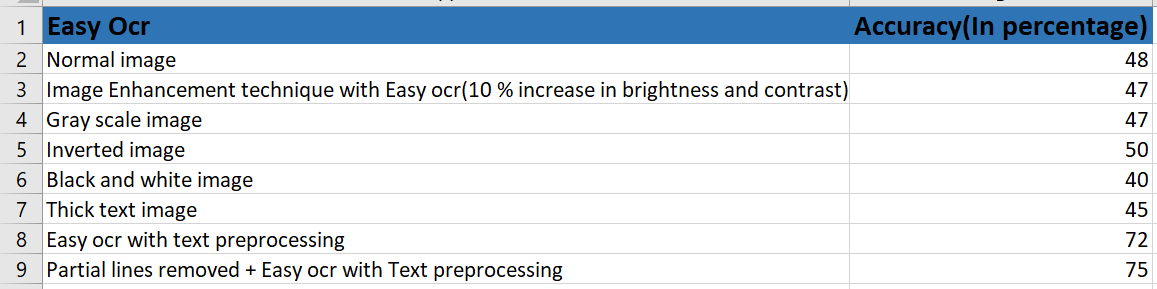